To run the Scripts, Please download the datasets from [dataset link](https://myunt-my.sharepoint.com/:f:/g/personal/dharankumarkunati_my_unt_edu/Eoub8ZV8aR1HsvGwybjKuuUBf-ALmoTMdMdv-iZcT-VB5A?e=ortaHV). Download both Train,Test datasets and change the path in "Importing Dataset Section"

# **Libraries**

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score, log_loss
import random
from google.colab import drive
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
drive.mount('/content/drive')

# **Importing** **Dataset**

In [ ]:
train_df = pd.read_csv('drive/MyDrive/Computersecurity/mnist_train.csv',header=None)
test_df =  pd.read_csv('drive/MyDrive/Computersecurity/mnist_test.csv',header=None)

# **Preprocessing**

In [2]:
#function to change the headers of the dataframe
c=[]
for i in range(785):
    c.append(str(i))
train_df.columns=c
test_df.columns=c
#Seperating features,labels from dataset
X_train=train_df.drop('0',axis = 1) 
Y_train=train_df['0']
X_test=test_df.drop('0',axis = 1) 
Y_test=test_df['0']
print(X_train.shape)
print(Y_train.shape)

In [7]:
#reshaping the images to fit into the neural network
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

# **Splitting Train data for validations**

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=20)

# **Convultional Neural Network**

In [9]:
#Neural Network Model
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)


x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

# **Image Augmentation**

In [10]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

# **Optimizations**

In [11]:
# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [12]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

# **Fitting the model**

In [14]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
epochs=25,callbacks=callbacks_list,verbose=1)

Epoch 1/3
1688/1688 [==============================] - 168s 99ms/step - loss: 0.1310 - accuracy: 0.9643 - val_loss: 0.0618 - val_accuracy: 0.9808 - lr: 0.1000
Epoch 2/3
1688/1688 [==============================] - 164s 97ms/step - loss: 0.0889 - accuracy: 0.9764 - val_loss: 0.0492 - val_accuracy: 0.9853 - lr: 0.1000
Epoch 3/3
1688/1688 [==============================] - 164s 97ms/step - loss: 0.0615 - accuracy: 0.9845 - val_loss: 0.0475 - val_accuracy: 0.9855 - lr: 0.0600


# **Logistic Function**

In [119]:

l=[]
X_train_pert=train_df.drop('0',axis = 1) 
X_train_pert=X_train_pert.to_numpy()
for i in range(60000):
    size=784
    r=4
    y=np.zeros(size)
    y[0]=random.uniform(0,0.1)
    for n in range(size-1):
        y[n+1]=r*y[n]*(1-y[n])
    k=[]
    for m in y:
        if(m<0.5):
            k.append(2);
        else:
            k.append(1);    
    l.append(k)    
for i in range(60000):
    for j in range(784):
        X_train_pert[i][j]=X_train_pert[i][j]+l[i][j]
X_train_pert=X_train_pert.reshape(-1,28,28,1)

# **Reshaping the data for predictions**

In [120]:
X_train1=train_df.drop('0',axis = 1) 
X_train1 = X_train1.values.reshape(-1,28,28,1)

In [ ]:
#original output
Y_train1=train_df['0']
Y_train1.to_numpy()

# **Predictions**

In [121]:
#model predictions
modelresult=np.argmax(model.predict(X_train1), axis=-1)

In [122]:
#model predictions after changing the images
modelresult_pert=np.argmax(model.predict(X_train_pert), axis=-1)

In [129]:
#Accuracy
sum=0
for i in range(60000):
  if(modelresult[i]==Y_train1[i]):
    sum=sum+1;
print('model accuracy without attack = ',sum/600)

model accuracy without attack =  96.98333333333333


In [130]:
sum=0
for i in range(60000):
  if(modelresult_pert[i]==Y_train1[i]):
    sum=sum+1;
print("model accuracy after attack = ",sum/600)

model accuracy after attack =  96.90166666666667


In [138]:
sum=0
for i in range(60000):
  if(modelresult_pert[i]==modelresult[i]):
    sum=0
  else:
    sum=i
    break;
print("error in ", sum)

error in  1209


model predicted result - 0


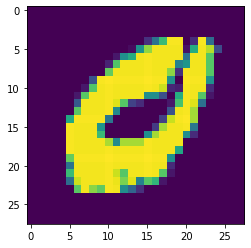

In [139]:
o=1209
image1=X_train1[o].reshape(28,28)
image2=X_train_pert[o].reshape(28,28)
plt.imshow(image1);
print("model predicted result -",modelresult[o])

result after attack -  9


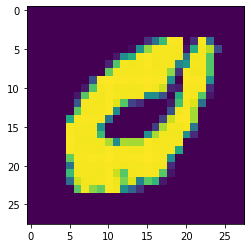

In [140]:
plt.imshow(image2);
print("result after attack - ",modelresult_pert[4])